# Protein Browser 


---

Copyright 2021 Google LLC. SPDX-License-Identifier: Apache-2.0

Notebook Version: 1.0

**Authors**: *Suhana Bedi, Khoa Hoang & Samantha Piekos*



#Overview
This is an interactive notebook describing providing an aesthetic visualization of protein properties and interaction networks. The user can enter a protein name of their choice, upon which it will be queried on [data commons](https://datacommons.org), and the corresponding visualizations will be displayed on the notebook. 
</br>
For each of the bar plots, an example protein is appended right next to its function to exemplify the graphical depiction. In addition, each bar plot is supported by a blurb, describing the information conveyed by it. 
</br>
Users can always browse more about proteins on the [data commons graph browser](https://datacommons.org/browser/). 

In [ ]:
#@title Install Data Commons
!pip install --upgrade --quiet datacommons

     |████████████████████████████████| 46 kB 1.6 MB/s 


In [ ]:
#@title Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
import datacommons as dc
import ipywidgets as widgets
import networkx as nx
from copy import deepcopy

### Visualization of Protein Properties

In [ ]:
#chart1
def chart_1(protein):
  detected_protein = dc.get_property_values([protein], prop="detectedProtein", out=False, value_type="HumanProteinOccurrence")
  detected_protein = list(detected_protein.values())[0]

  tissue_type = []
  exp_score = []
  for i in range(len(detected_protein)):
      p = list(dc.get_property_values([detected_protein[i]], prop="humanTissue").values())[0][0]
      tissue_type.insert(i, p)
      q = list(dc.get_property_values([detected_protein[i]], prop="proteinExpressionScore").values())[0][0]
      exp_score.insert(i, q)
  df_1 = pd.DataFrame(list(zip(tissue_type, exp_score)),
                columns =['tissue_type', 'exp_score'])
  num_score = []
  for i in df_1.index:
      if df_1.loc[i,'exp_score'] == 'ProteinExpressionNotDetected':
          num_score.append(0)
      elif df_1.loc[i,'exp_score'] == 'ProteinExpressionLow': 
          num_score.append(1)
      elif df_1.loc[i,'exp_score'] == 'ProteinExpressionMedium': 
          num_score.append(2)    
      else:
          num_score.append(3)
  df_1['num_score'] = num_score
  color_dict = {'AdiposeTissue':'khaki', 'AdrenalGland':'bisque', 'Appendix':'peru', 'BoneMarrow':'lightyellow',
              'Breast':'mistyrose', 'Bronchus':'tomato', 'Cartilage':'seashell',
              'Caudate':'lightcoral', 'Cerebellum':'lightcoral', 'CerebralCortex':'lightcoral',
              'CervixUterine':'mistyrose', 'ChoroidPlexus':'lightcoral',
              'Colon':'maroon', 'DorsalRaphe':'lightcoral', 'Duodenum':'firebrick',
              'Endometrium1':'mistyrose', 'Endometrium2':'mistyrose',
              'Epididymis':'mistyrose', 'Esophagus':'chocolate', 'Eye':'coral',
              'FallopianTube':'mistyrose', 'Gallbladder':'rosybrown',
              'Hair':'salmon', 'HeartMuscle':'brown', 'Hippocampus':'lightcoral',
              'Hypothalamus':'lightcoral', 'Kidney':'bisque', 'LactatingBreast':'mistyrose',
              'Liver':'darksalmon','Lung':'tomato', 'LymphNode':'indianred', 
                'Nasopharynx':'tomato', 'OralMucosa':'darkorange', 'Ovary':'mistyrose',
              'Pancreas':'orangered', 'ParathyroidGland':'snow', 'PituitaryGland':'sienna',
              'Placenta':'mistyrose', 'Prostate':'mistyrose', 'Rectum':'maroon', 
              'Retina':'coral', 'SalivaryGland':'lightsalmon', 'SeminalVesicle':'mistyrose',
              'SkeletalMuscle':'linen', 'Skin':'peachpuff', 'Skin1':'peachpuff',
              'Skin2':'peachpuff', 'SmallIntestine':'ivory', 'SmoothMuscle':'red', 
              'SoftTissue1':'burlywood', 'SoftTissue2':'burlywood', 'Spleen':'tan',
              'Stomach1':'darkred', 'Stomach2':'darkred', 'SubstantiaNiagra':'lightcoral',
              'Testis':'mistyrose', 'Thymus':'indianred', 'ThyroidGland':'snow',
              'Tonsil':'saddlebrown', 'UrinaryBladder':'sandybrown', 'Vagina':'mistyrose'}
  col = []
  color_list = []

  for val in df_1['tissue_type']:
      col.append(color_dict.get(val))
  df_1['groups'] = col 
  df_1 = df_1.sort_values('groups').reset_index()   
  

  figure(num=None, figsize=(20, 35))
  font = {'size' : 12}

  plt.rc('font', **font)
  lab_x = [i for i in range(len(df_1.index))]
  y_pos = np.arange(len(lab_x))
  plt.barh(y_pos, 'num_score',data=df_1, color = list(df_1['groups']))
  plt.title("Expression Score VS Tissue Type")
  plt.xlabel("Expression Score")
  plt.ylabel("Tissue Type")
  positions = (0, 1, 2, 3)
  labels = ("Not Detected", "Low", "Medium", "High")
  plt.xticks(positions, labels)
  plt.xticks(np.arange(0, 4, 1.0))
  plt.yticks(y_pos, lab_x)
  plt.yticks(lab_x, list(df_1['tissue_type']))
  plt.show()

  

  '''
  plt.bar(lab_x, 'num_score',data=df_1, color = list(df_1['groups']))
  plt.title("Expression Score VS Tissue Type")
  plt.xlabel("Tissue Type")
  plt.ylabel("Expression Score")
  positions = (0, 1, 2, 3)
  labels = ("Not Detected", "Low", "Medium", "High")
  plt.yticks(positions, labels)
  plt.yticks(np.arange(0, 4, 1.0))
  plt.xticks(lab_x, list(df_1['tissue_type']), rotation=90)
  plt.show()
  '''

A Bar Plot displaying the expression score of a specific protein, in each tissue. All tissues are color coded with respect to their location and function. </br>
Functionality Needed: To be able to hover over each bar and get :</br>
- Human Cell type
- Protein Occurence Reliability
- Protein Expression score
- Link to the node on Data Commons
- Ability to download the entire list in the form of txt or csv

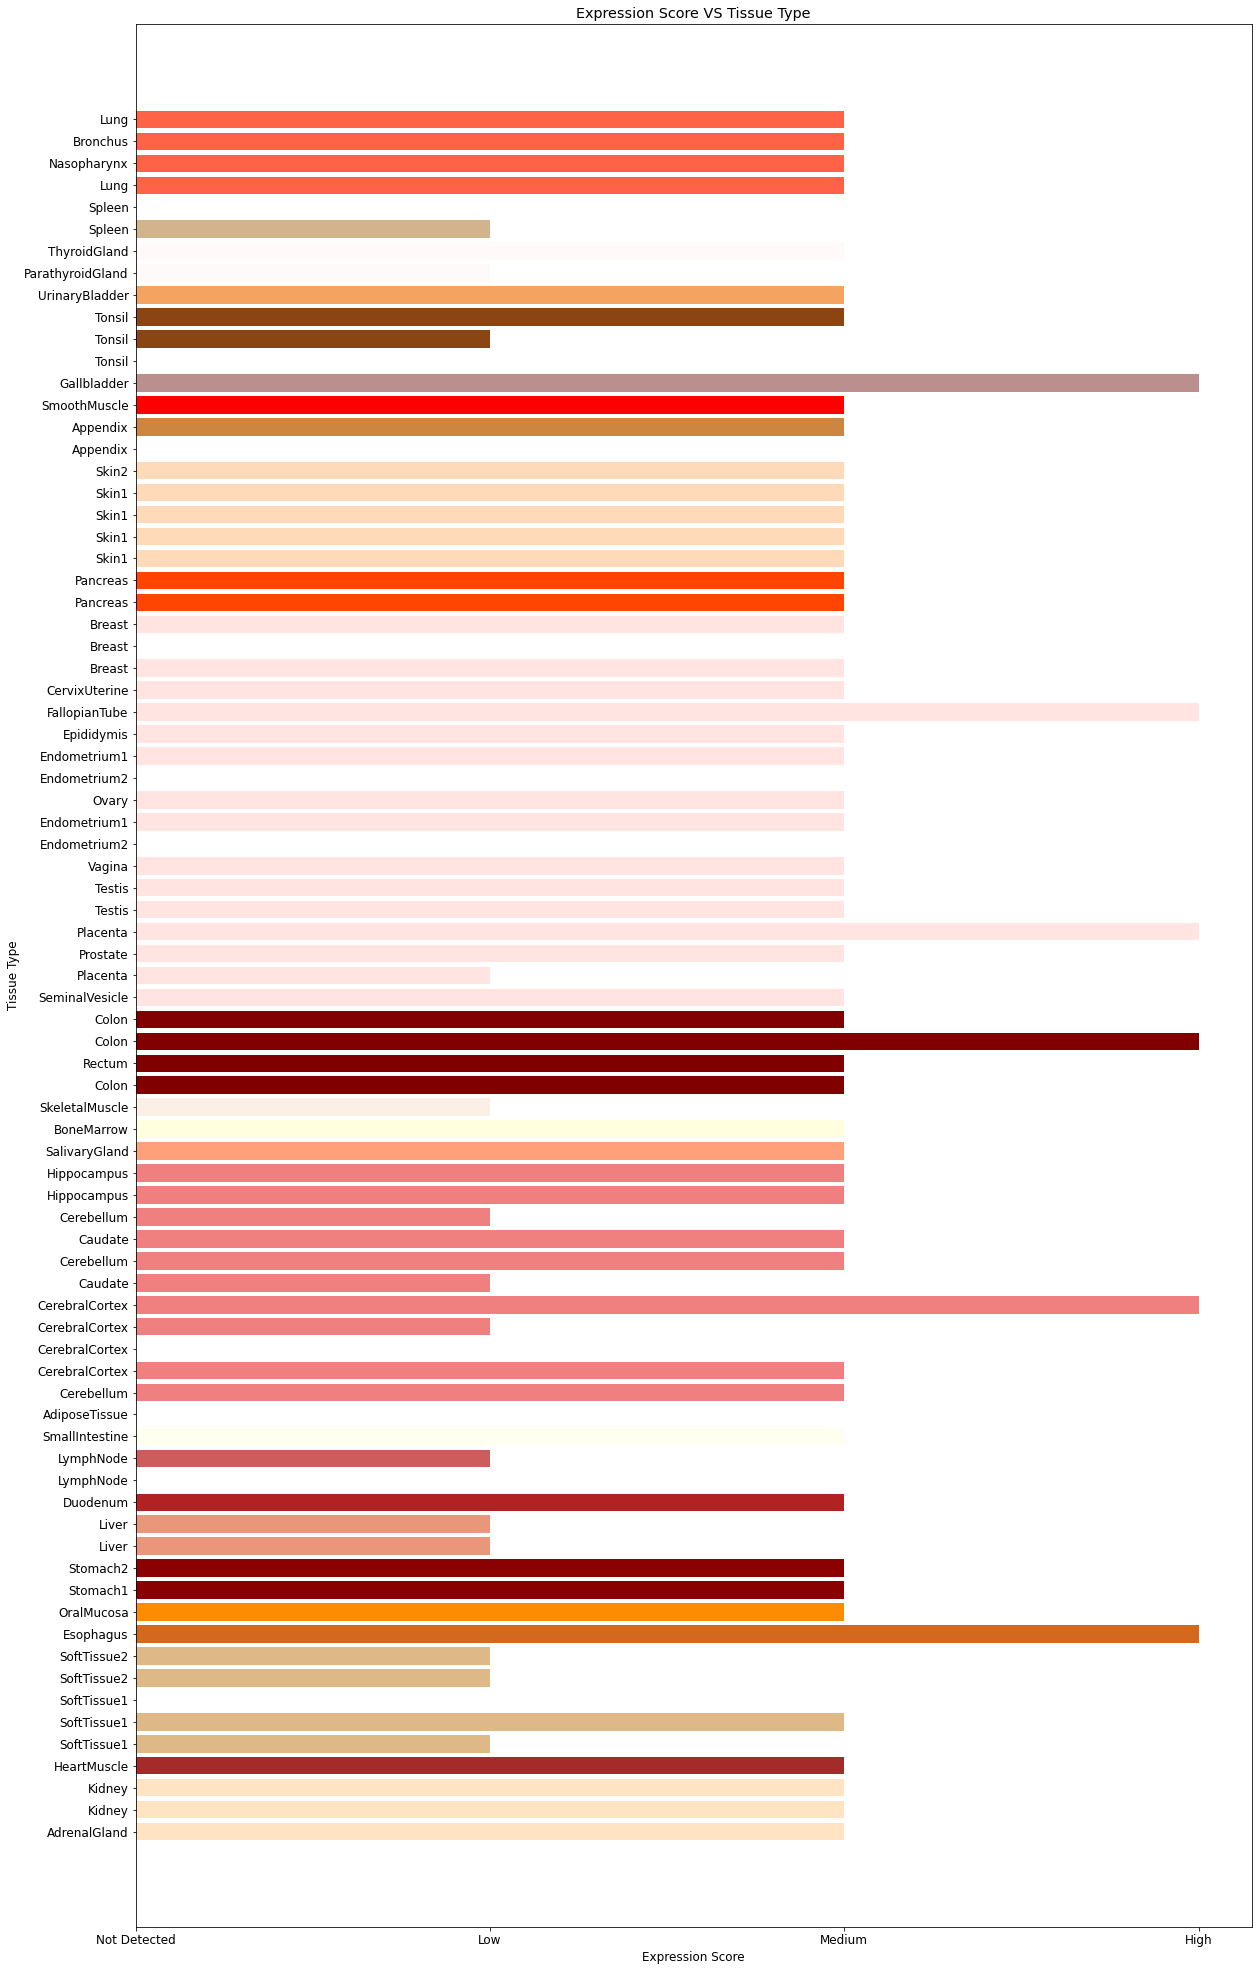

In [ ]:
chart_1('bio/FGFR1_HUMAN')

In [ ]:
def chart_2(protein):
  interactions = list(dc.get_property_values([protein], prop="interactingProtein", out = False).values())[0]
  confidence_score =[]
  for i in range(len(interactions)):
      #list(dc.get_property_values([disease_gene[i]], prop="associationConfidenceInterval").values())[0][0]
      p = list(dc.get_property_values([interactions[i]], prop="confidenceScore").values())[0]
      if len(p) == 1:
          p_1 = p[0]
      else:
          p_1 = p[1]
      q = list(dc.get_property_values([p_1], prop="value").values())[0][0]
      confidence_score.insert(i,q)
  confidence_score = list(map(float, confidence_score))
  df = pd.DataFrame(list(zip(interactions, confidence_score)),
                columns =['Interacting_protein', 'Confidence_score'])
  df = df.sort_values('Confidence_score', ascending = True)
  figure(num=None, figsize=(8, 8))
  font = {'size' : 12}

  plt.rc('font', **font)

  if len(df.index) < 30:
    confidence_score = list(df['Confidence_score'])
    interacting_protein = list(df['Interacting_protein'])
    y_pos = np.arange(len(interacting_protein))
    # Create horizontal bars
    plt.barh(y_pos, confidence_score, color = 'maroon')
    plt.yticks(y_pos, interacting_protein)
    plt.ylabel('Interacting_protein')
    plt.xlabel('Confidence Score')
    
    plt.show()
  else:
    figure(num=None, figsize=(35, 15))
    font = {'family' : 'Times New Roman',
            'size'   : 10}

    plt.rc('font', **font)


    # Draw first subplot using plt.subplot
    ax1 = plt.subplot(1, 2, 1)
    data = df[df['Confidence_score']<0.5]
    confidence_score = list(data['Confidence_score'])
    interacting_protein = list(data['Interacting_protein'])
    y_pos = np.arange(len(interacting_protein))
    # Create horizontal bars
    plt.barh(y_pos, confidence_score, color = 'maroon')
    plt.yticks(y_pos, interacting_protein)
    plt.ylabel('Interacting_protein')
    plt.xlabel('Confidence Score')

    # Draw second subplot using plt.subplot
    ax2 = plt.subplot(1, 2, 2)
    data = df[df['Confidence_score']>=0.5]
    confidence_score = list(data['Confidence_score'])
    interacting_protein = list(data['Interacting_protein'])
    y_pos = np.arange(len(interacting_protein))
    # Create horizontal bars
    plt.barh(y_pos, confidence_score, color = 'maroon')
    plt.yticks(y_pos, interacting_protein)
    plt.ylabel('Interacting_protein')
    plt.xlabel('Confidence Score')
    plt.show()
    

A Bar Plot displaying the names of interacting proteins on the x-axis and the confidence score of interaction on the y-axis, for a specific protein. </br>
Functionality Needed : To be able to hover over each bar and get : </br>
- Confidence score
- Interacting protein names
- Interaction type
- Interaction detection method
- Link to the node on Data Commons
- Ability to download the entire list in the form of txt or csv

<Figure size 576x576 with 0 Axes>

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


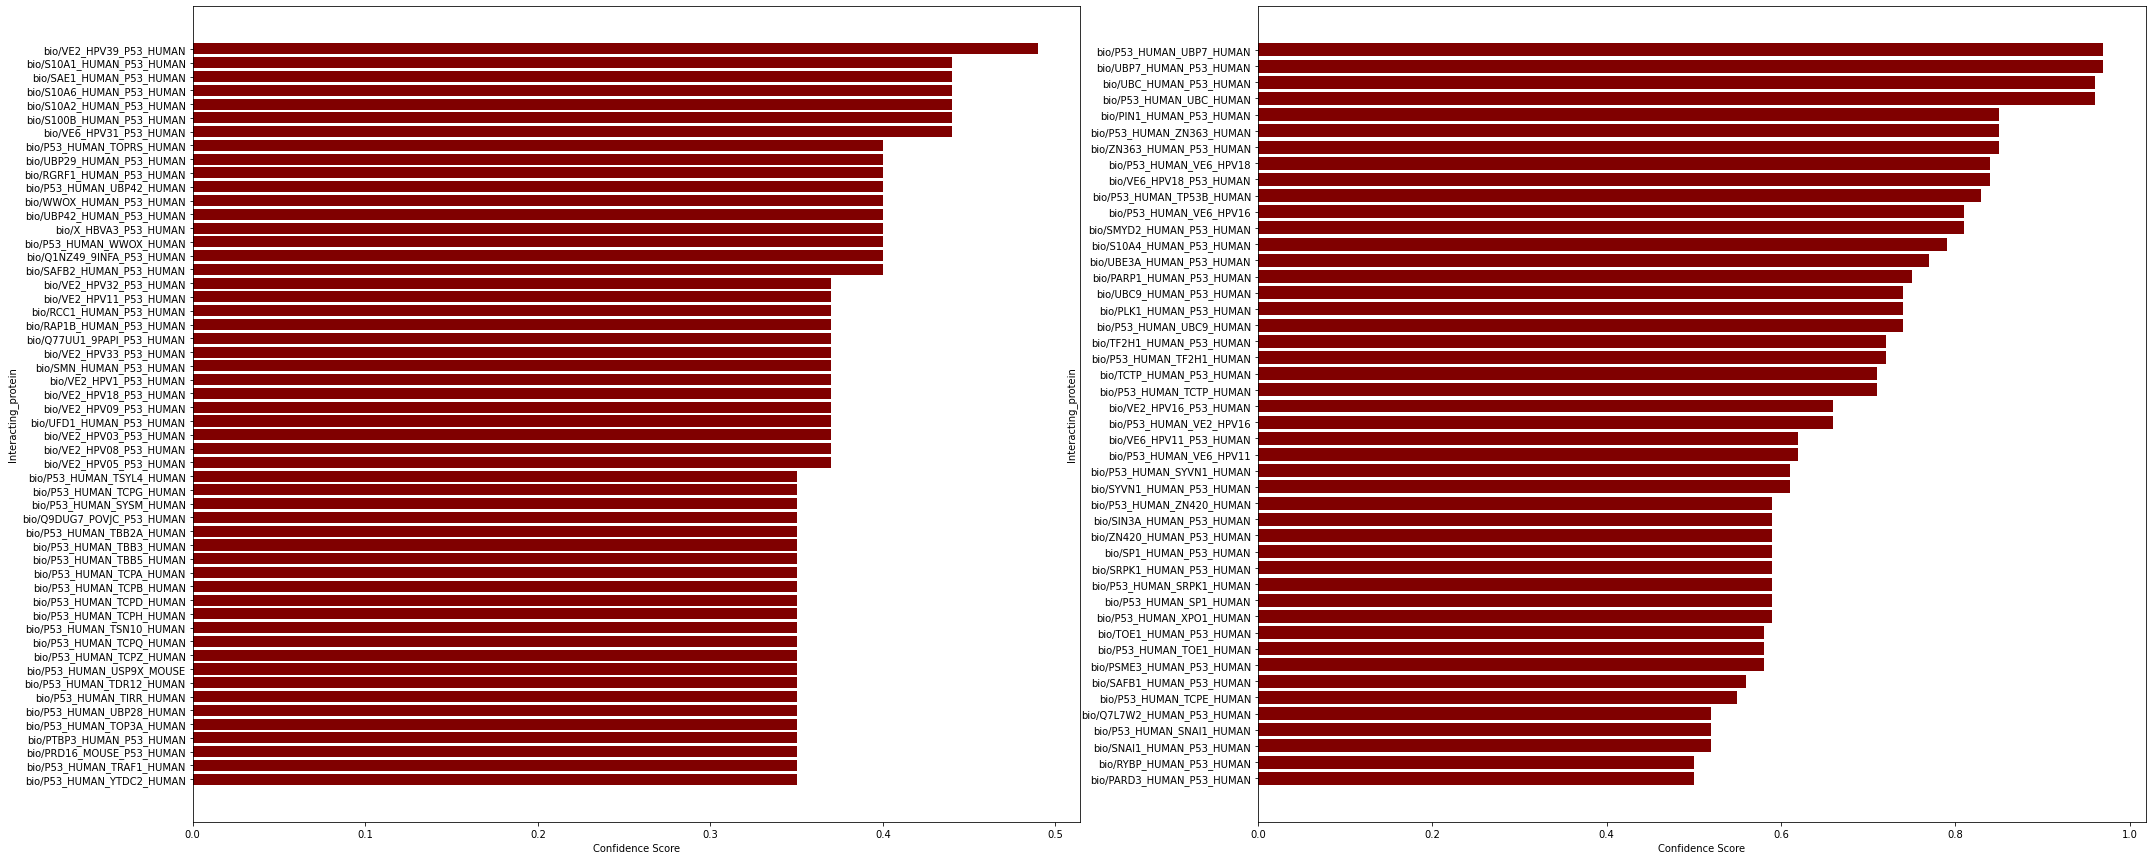

In [ ]:
chart_2('bio/P53_HUMAN')

In [ ]:
# Chart 3 
def chart_3(protein):
  geneId = dc.get_property_values([protein], prop="geneID")
  geneId_hg38 = list(geneId.values())[0][1]
  disease_gene = dc.get_property_values([geneId_hg38], prop="geneID", out=False, value_type="DiseaseGeneAssociation")
  disease_gene = list(disease_gene.values())[0]
  association_confidence = []
  disease_name = []
  for i in range(len(disease_gene)):
      p = list(dc.get_property_values([disease_gene[i]], prop="associationConfidenceInterval").values())[0][0]
      association_confidence.insert(i, p)
      try:
          q = list(dc.get_property_values([disease_gene[i]], prop="diseaseOntologyID").values())[0][0]
          r = list(dc.get_property_values([q], prop="commonName").values())[0][0]
          disease_name.insert(i,r )

      except:
          disease_name.insert(i,'no-name' )
          pass
  association_confidence = list(map(float, association_confidence)) 
  df = pd.DataFrame(list(zip(disease_name, association_confidence)),
                columns =['disease_name', 'association_confidence'])
  df = df.sort_values('association_confidence', ascending = True) 
  figure(num=None, figsize=(15, 20))
  font = {'size': 10}

  plt.rc('font', **font)
  disease_name = list(df['disease_name'])
  association_confidence = list(df['association_confidence'])
  y_pos = np.arange(len(disease_name))
  # Create horizontal bars
  plt.barh(y_pos, association_confidence, color = 'maroon')
  plt.yticks(y_pos, disease_name)
  plt.ylabel('Disease Names')
  plt.xlabel('Association Confidence Score')
  # Create names on the x-axis
  #plt.yticks(y_pos, bars)
  
  # Show graphic
  plt.show()
  '''
  plt.bar('disease_name', 'association_confidence', data=df, color ='maroon')
  plt.title("Association Confidence Interval VS Disease Name")
  plt.xlabel("Disease Names")
  plt.ylabel("Association Confidence Interval")
  plt.xticks(rotation=90)
  plt.show()      
  '''

A bar plot depicting the disease associations and their corresponding confidence intervals, for a specific protein. </br>
Functionality needed: </br>
- Association confidence interval
- Association confidence score
- Association identifier
- Link to the node on Data Commons
- Ability to download the entire list in the form of txt or csv

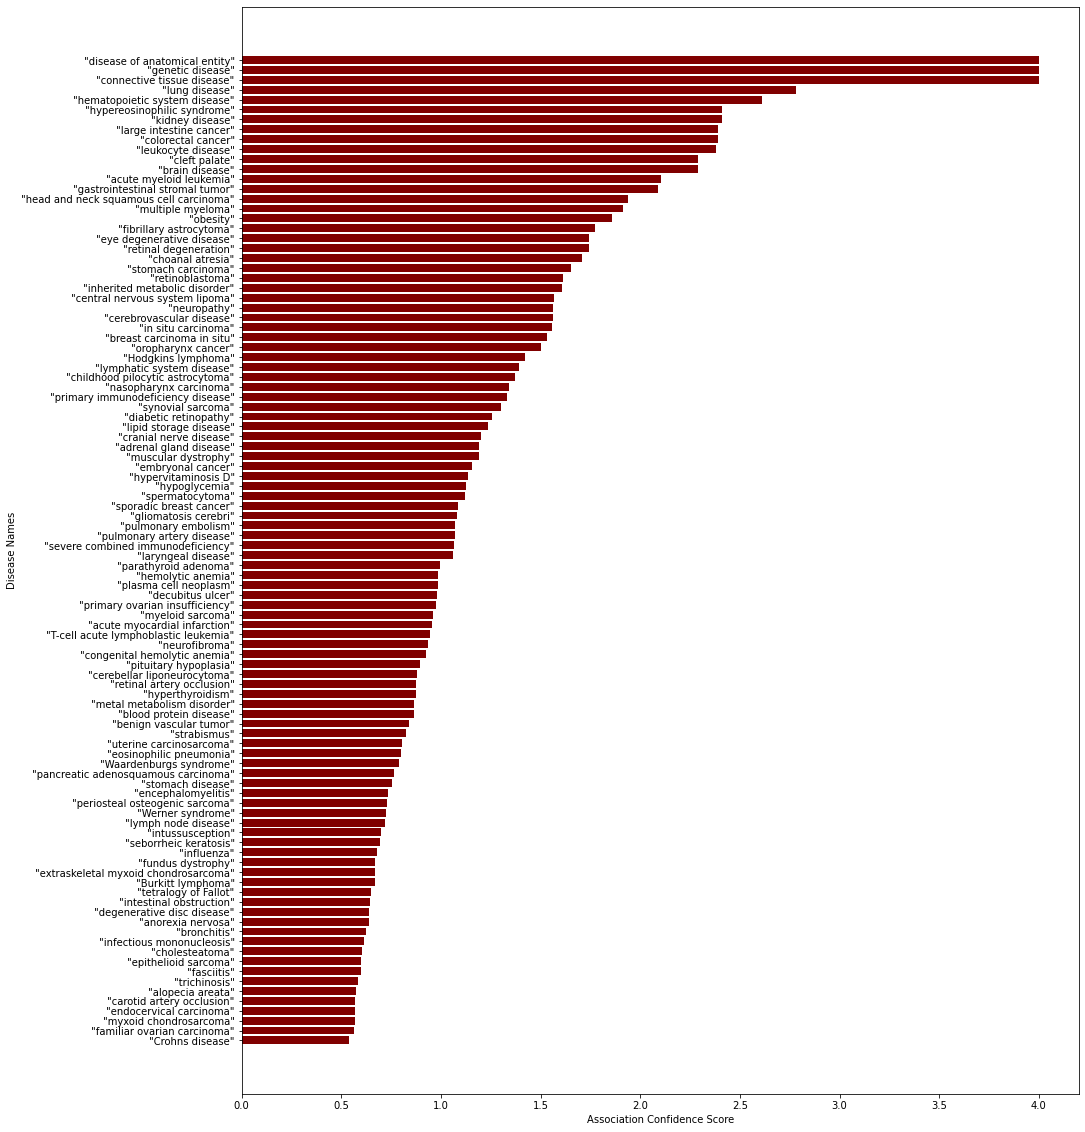

In [ ]:
chart_3('bio/FGFR1_HUMAN')

In [ ]:
# Chart 4
def chart_4(protein):
  geneId = dc.get_property_values([protein], prop="geneID")
  geneId_hg38 = list(geneId.values())[0][1]
  disease_gene_variant = dc.get_property_values([geneId_hg38], prop="geneSymbol", out=False, value_type="GeneticVariantGeneAssociation")
  disease_gene_variant = list(disease_gene_variant.values())[0]
  rs_id = []
  log2_allele = []
  log2_allelic_interval = []
  tissue_type = []


  association_confidence = []
  disease_name = []
  for i in range(len(disease_gene_variant)):
      try:
          p = list(dc.get_property_values([disease_gene_variant[i]], prop="log2AllelicFoldChange").values())[0][0]
          q = list(dc.get_property_values([disease_gene_variant[i]], prop="log2AllelicFoldChangeConfidenceInterval").values())[0][0]
          r = list(dc.get_property_values([disease_gene_variant[i]], prop="referenceSNPClusterID").values())[0][0]
          t = list(dc.get_property_values([disease_gene_variant[i]], prop="associatedTissue").values())[0][0]
          log2_allele.insert(i, p)
          log2_allelic_interval.insert(i, q)
          rs_id.insert(i, r)
          tissue_type.insert(i, t)
      except:
          pass
  log2_allele = list(map(float, log2_allele))
  df_4 = pd.DataFrame(list(zip(rs_id, log2_allele, log2_allelic_interval,
                              tissue_type)),
                columns =['rs_id', 'log2_allele', 'log2_allelic_interval', 'tissue_type' ])

  for i in df_4.index:
    p = df_4.loc[i,'log2_allelic_interval']
    q = p.split(" ")[0]
    r = p.split(" ")[1]
    import re
    q = q[1:]
    q = float(q)
    r = r[:-1]
    r = float(r)
    df_4.loc[i,'log2_allelic_interval_start'] = q
    df_4.loc[i,'log2_allelic_interval_stop'] = r
    for i in df_4.index:
      df_4.loc[i,'error'] = df_4.loc[i,'log2_allelic_interval_stop'] - df_4.loc[i,'log2_allelic_interval_start']
  figure(num=None, figsize=(8, 10))
  font = {'size': 8}

  plt.rc('font', **font)

  # Draw first subplot using plt.subplot
  plt.subplot(1, 3, 1)
  plt.title('log2 Allele Confidence vs Variant ID ')
  plt.errorbar('rs_id', 'log2_allele',data = df_4.loc[df_4['tissue_type'] == 'Pancreas'], yerr='error', fmt='o', color='maroon',
             ecolor='lightcoral', elinewidth=3, capsize=0)
  plt.yticks(np.arange(-0.5, 1.2, 0.2))
  plt.xlabel('rs ID (PANCREAS)')
  plt.ylabel('log2 Allele Confidence')
  plt.axhline(y=0,linewidth=1, color='k')

  # Draw second subplot using plt.subplot
  plt.subplot(1, 3, 2)
  #plt.title('log2 Allele Confidence vs Variant ID ')
  plt.errorbar('rs_id', 'log2_allele',data = df_4.loc[df_4['tissue_type'] == 'Thyroid'], yerr='error', fmt='o', color='maroon',
             ecolor='mistyrose', elinewidth=3, capsize=0)
  plt.yticks(np.arange(-0.5, 1.2, 0.2))
  plt.xlabel('rs ID (THYROID)')
  plt.ylabel('log2 Allele Confidence')
  plt.axhline(y=0,linewidth=1, color='k')

  plt.subplot(1, 3, 3)
  plt.errorbar('rs_id', 'log2_allele',data = df_4.loc[df_4['tissue_type'] == 'Whole Blood'], yerr='error', fmt='o', color='maroon',
             ecolor='orange', elinewidth=3, capsize=0)
  plt.yticks(np.arange(-0.5, 1.2, 0.2))
  plt.xlabel('rs ID (WHOLE BLOOD)')
  plt.ylabel('log2 Allele Confidence')
  plt.axhline(y=0,linewidth=1, color='k')

  plt.show()


Three bar plots, each specifying the variants associated with a protein-coding gene and its corresponding log2 allele confidence score. The error bars are indicative of the log2 confidence interval. Each bar plot is for each tissue: Pancreas, Thyroid, Human Blood. </br>
Functionality Needed: </br>
- Gene position and gene symbol
- log2 Allelic fold change
- p value
- Reference snp ID
- Link to the data commons node
- Ability to download the entire list in the form of txt or csv

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


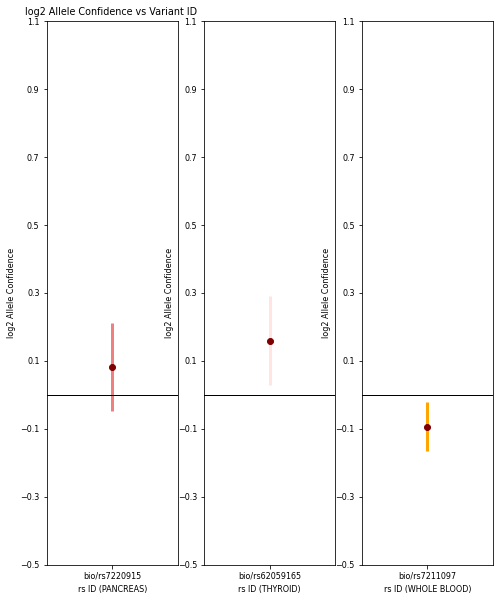

In [ ]:
chart_4('bio/P53_HUMAN')

In [ ]:
#chart 5
def chart_5(protein):
  geneId = dc.get_property_values([protein], prop="geneID")
  geneId_hg38 = list(geneId.values())[0][1]
  gene_variant = dc.get_property_values([geneId_hg38], prop="geneID", out=False, value_type="GeneticVariant")
  gene_variant = list(gene_variant.values())[0]
  variant_functional_category = []
  clinical_sig = []

  for i in range(len(gene_variant)):
      try:
          p = list(dc.get_property_values([gene_variant[i]], prop="geneticVariantFunctionalCategory").values())[0][0]
          p_1 = list(dc.get_property_values([p], prop="name").values())[0][0]
          q = list(dc.get_property_values([gene_variant[i]], prop="clinicalSignificance").values())[0][0]
          q_1 = list(dc.get_property_values([q], prop="name").values())[0][0]

          variant_functional_category.insert(i, p_1)
          clinical_sig.insert(i, q_1)

      except:
          pass
  functional_category = ["3' UTR", "5' UTR", "Coding Synonomous", "Frameshift", "Intron", "Missense", "Near Gene 3'", "Near Gene 5'",
                         "Nonsense", "Splice 3'", "Splice 5'", "Stop Loss", "Unknown", "cds Indel", "cds Reference", "ncRNA"]
  clinical_sig = ['Affects', 'Association', 'Association Not Found', 'Benign', 'Benign/Likely Benign', 'Conflicting Interpretations Of Pathogenicity', 
                'Drug Response', 'Histocompatibility', 'Likely Benign', 'Likely Pathogenic', 'Not Provided', 'Other', 'Pathogenic', 'Pathogenic/Likely Pathogenic',
                'Protective', 'Risk Factor', 'Uncertain Significance', 'Unknown', 'Untested']

  df_5 = pd.DataFrame(list(zip(gene_variant, variant_functional_category, clinical_sig)),
                columns =['gene_variant', 'variant_functional_category', 'clinical_significance'])
  df_5_variant = pd.DataFrame(df_5.groupby(['variant_functional_category']).size())
  df_5_variant['var'] = df_5_variant.index
  df_5_variant['count'] = df_5_variant[0] 
  for val in functional_category:
    if val not in df_5_variant.values:
      new_row = { 'var' : val, 'count' : 0}
      df_5_variant = df_5_variant.append(new_row, ignore_index=True)
  df_5_clinical = pd.DataFrame(df_5.groupby(['clinical_significance']).size())
  df_5_clinical['sig'] = df_5_clinical.index
  df_5_clinical['count'] = df_5_clinical[0]
  for val in clinical_sig:
    if val not in df_5_clinical.values:
      new_row = { 'sig' : val, 'count' : 0}
      df_5_clinical = df_5_clinical.append(new_row, ignore_index=True)
  df_5_clinical = df_5_clinical.reindex(['Pathogenic', 'Pathogenic/Likely Pathogenic', 'Likely Pathogenic', 'Conflicting Interpretations Of Pathogenicity',
                       'Drug Response', 'Histocompatibility', 'Association', 'Affects', 'Protective', 'Benign', 'Benign/Likely Benign',
                       'Likely Benign', 'Association Not Found', 'Other', 'Not Provided', 'Uncertain Significance', 'Unknown', 'Untested'])

  
  figure(figsize=(10, 10))

  font = {'size': 12}

  plt.rc('font', **font)
  my_colors = ['mistyrose',  'maroon', 'salmon', 'tomato', 'coral', 'orangered', 'sandybrown', 'peachpuff', 'peru']

  # Draw first subplot using plt.subplot
  plt.subplot(2, 1, 1)
  sig = list(df_5_clinical['sig'])
  count = list(df_5_clinical['count'])
  y_pos = np.arange(len(sig))
  plt.barh(y_pos, count, color = my_colors)
  plt.ylabel('clinical significance')
  plt.xticks(np.arange(0, 6, 1.0))
  plt.yticks(y_pos, sig)
  plt.xlabel('count')
 


  # Draw second subplot using plt.subplot

  plt.subplot(2, 1, 2)
  var = list(df_5_variant['var'])
  count = list(df_5_variant['count'])
  y_pos = np.arange(len(var))
  plt.barh(y_pos, count, color = my_colors)
  plt.ylabel('variant type')
  plt.xticks(np.arange(0, 15, 2.0))
  plt.yticks(y_pos, var)
  plt.xlabel('count')
  plt.show()
  

Two bar plots displaying genetic variant categories and counts for a specific protein-coding gene. The first graph is depicting the clinical significance of the variants while the second graph is depicting the variant type.


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


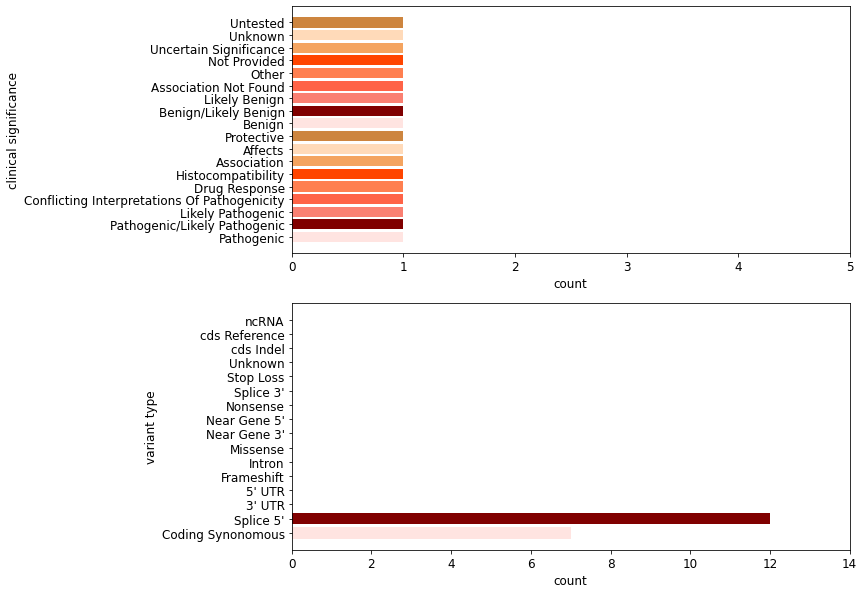

In [ ]:
chart_5('bio/P53_HUMAN')

In [ ]:
#chart 6
def chart_6(protein):
  geneId = dc.get_property_values([protein], prop="geneID")
  geneId_hg38 = list(geneId.values())[0][1]
  chem_gene = dc.get_property_values([geneId_hg38], prop="geneID", out=False, value_type="ChemicalCompoundGeneAssociation")
  chem_gene = list(chem_gene.values())[0]
  chem_relation = []


  for i in range(len(chem_gene)):
      try:
          p = list(dc.get_property_values([chem_gene[i]], prop="relationshipAssociationType").values())[0][0]
          q = list(dc.get_property_values([p], prop="name").values())[0][0]
          chem_relation.insert(i, q)


      except:
          pass

  df_6 = pd.DataFrame(list(zip(chem_gene, chem_relation)),
                columns =['chem_gene', 'chem_relation'])
  df_6 = pd.DataFrame(df_6.groupby(['chem_relation']).size())
  df_6['var'] = df_6.index
  df_6['count'] = df_6[0] 
  categories = ['Ambiguous', 'Associated', 'NotAssociated']
  for val in categories:
    if val not in df_6.values:
      new_row = { 'var' : val, 'count' : 0}
      df_6 = df_6.append(new_row, ignore_index=True)
  figure(num=None, figsize=(10, 5))

  font = {'size'   : 12}
  my_colors = ['mistyrose',  'maroon', 'salmon', 'tomato', 'coral', 'orangered', 'sandybrown', 'peachpuff', 'peru']
  plt.rc('font', **font)
  '''
  plt.subplot(2, 1, 1)
  sig = list(df_5_clinical['sig'])
  count = list(df_5_clinical['count'])
  y_pos = np.arange(len(sig))
  plt.barh(y_pos, count, color = my_colors)
  plt.ylabel('clinical significance')
  plt.xticks(np.arange(0, 6, 1.0))
  plt.yticks(y_pos, sig)
  plt.xlabel('count')
  '''

  var = list(df_6['var'])
  count = list(df_6['count'])
  y_pos = np.arange(len(var))
  plt.barh(y_pos, count, color = my_colors)
  plt.ylabel('clinical significance')
  plt.xticks(np.arange(0, 15, 2.0))
  plt.yticks(y_pos, var)
  plt.title('Count VS Relationship of chemical compound with gene')
  plt.show()


A bar plot counting the various types of association relationships between the protein-coding gene and chemical compounds.

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


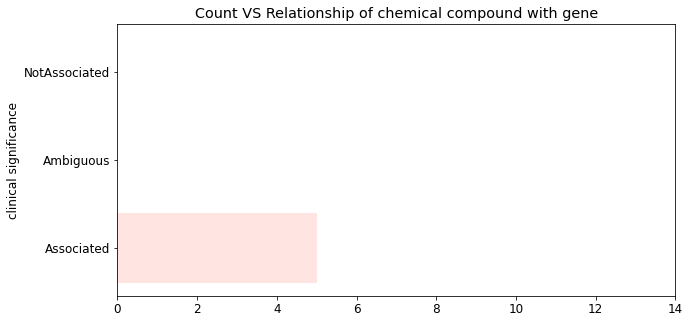

In [ ]:
chart_6("bio/P53_HUMAN")

In [ ]:
#@title Input Proteins and Species
interaction_types = list(dc.get_property_values(["InteractionTypeEnum"], prop = "typeOf", out = False, limit = 500).values())[0]
detection_types = list(dc.get_property_values(["InteractionDetectionMethodEnum"], prop = "typeOf", out = False, limit = 500).values())[0]
proteins = list(dc.get_property_values(["Protein"], prop = "typeOf", out = False).values())[0]
species_results = dc.query("""
SELECT DISTINCT ?species_name 
WHERE{
?protein typeOf Protein .
?species typeOf Species .
?protein ofSpecies ?species .
?species commonName ?species_name 
}
""")
species = sorted([species["?species_name"] for species in species_results])
species_options = widgets.Dropdown(
    options= species,
    rows=5,
    value= "Human" ,
    description='Species:',
    disabled=False
)

protein_input = widgets.Text(
    placeholder='ex: P53',
    description='Protein:',
    rows = 1,
    disabled=False
)

grid = widgets. GridspecLayout(1, 3)
grid[0, 0] = species_options
grid[0, 1] = protein_input


grid

GridspecLayout(children=(Dropdown(description='Species:', index=201, layout=Layout(grid_area='widget001'), opt…

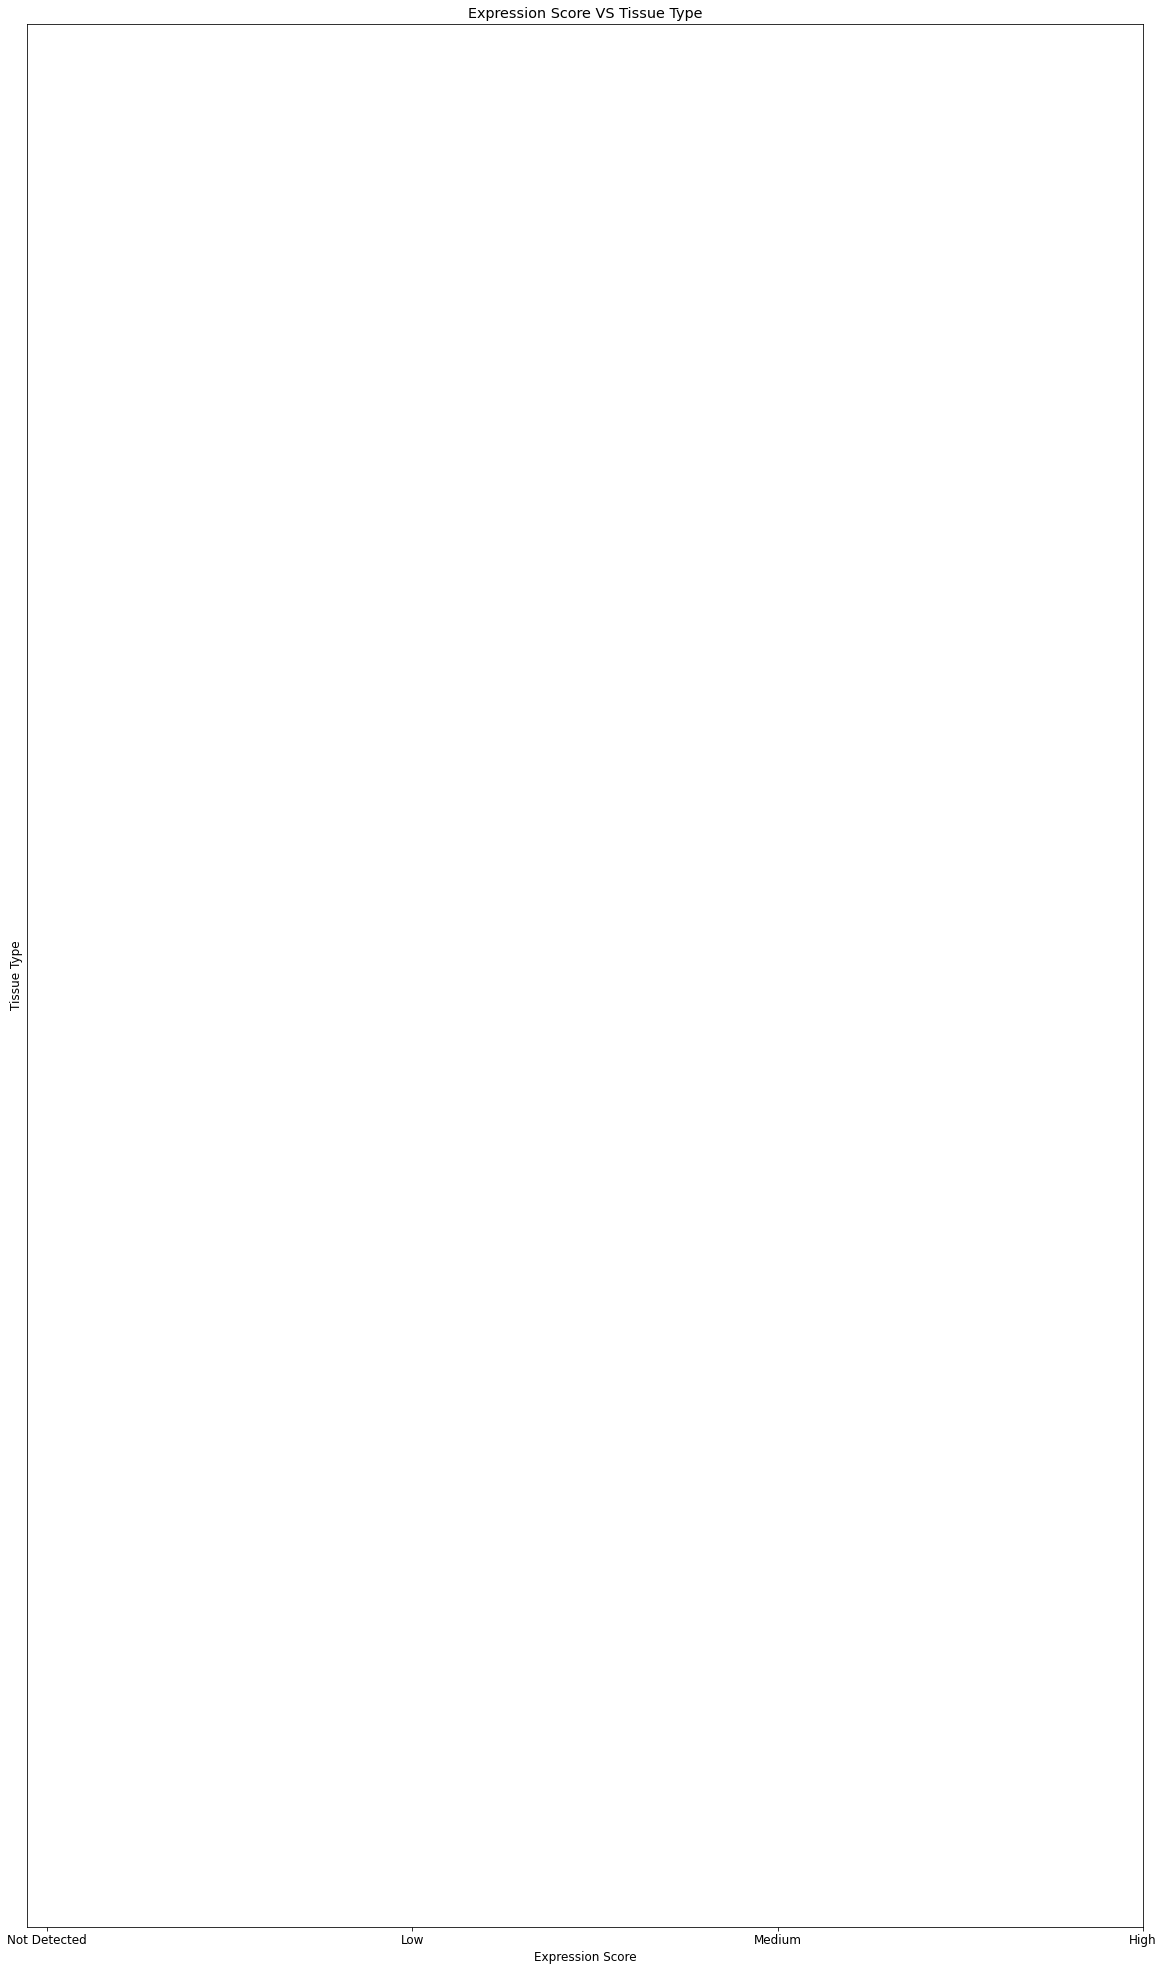

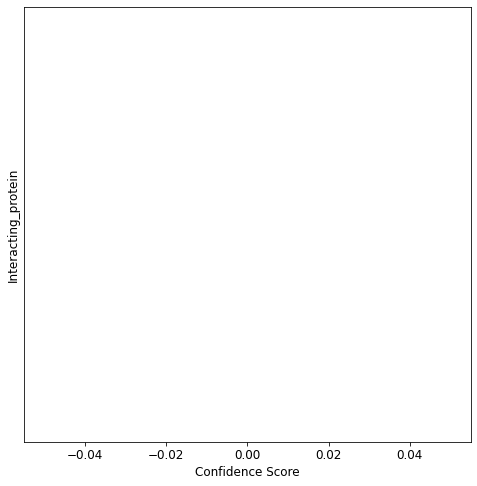

IndexError: ignored

In [ ]:
#@title Output Charts
p = protein_input.value
s = species_options.value
s = s.upper()
protein = "bio/" + str(p) + "_" + str(s)
chart_1(protein)
chart_2(protein)
chart_3(protein)
chart_4(protein)
chart_5(protein)
chart_6(protein)

## Protein Interaction Viewer

Below are functions used to query protein interation information based on filter criteria such as interaction score, detection method, interaction type, and protein species. Information on protein interactions will then be used to construct a protein interaction graph using NetworkX package

In [ ]:
def get_interaction_info(interactions):

  """
  Generate a pandas dataframe containing informations of protein interactions from a list of protein-protein interaction dcids
  Columns: "interaction_id", "interaction_score", "interaction_type", "detection_method", "protein_1", "protein_2"
  
  IntactMiScore is used for protein interaction score. Missing IntactMiScore is imputed with IntactMiScore0.22 (minimum score)
  
  Args:
      interactions: A list of ProteinProteinInteraction dcids.
  
  Returns:
      A pandas dataframe with protein protein interactions information
  """

  interaction_scores = []
  # Use interaction score type IntactMiScore
  for score in list(dc.get_property_values(interactions, prop= "confidenceScore", out = True).values()):
      if not any(score):
          interaction_scores.append(["IntactMiScore0.22"]) #Impute missing score with minimum score 
      for score_type in score:
          if "IntactMiScore" in score_type:
              interaction_scores.append([score_type])
              break
          else:
              interaction_scores.append(["IntactMiScore0.22"]) #Impute missing Intact score with minimum score 
              break
  
  interaction_score_map = dc.get_property_values(np.array(interaction_scores).flatten(), prop= "value", out = True)
  interaction_score_values = [interaction_score_map[score[0]][0] for score in interaction_scores]
  interaction_types = list(dc.get_property_values(interactions, prop= "interactionType", out = True).values())
  detection_methods = list(dc.get_property_values(interactions, prop= "interactionDetectionMethod", out = True).values())
  
  
  interacting_proteins = list(dc.get_property_values(interactions, prop= "interactingProtein", out = True).values())
  interacting_proteins = [i if len(i) > 1 else [i[0], i[0]] for i in interacting_proteins ] # expand self interacting proteins
  
  protein_1, protein_2 = np.array(interacting_proteins).T[0], np.array(interacting_proteins).T[1]

  df_protein_interaction = pd.DataFrame([interactions, interaction_score_values, interaction_types,\
                        detection_methods,protein_1, protein_2]).T
  df_protein_interaction.columns = ["interaction_id", "interaction_score", "interaction_type",\
                                    "detection_method", "protein_1", "protein_2"]
  return df_protein_interaction


In [ ]:
def filter_interaction(df_protein_interaction, filter_criteria):

    """Filter protein interaction dataframe based on filter criteria  
  
      Args:
          df_protein_interaction: pandas DataFrame from output of get_interaction_info()
          filter_criteria: {
            "minimum_interaction_score":
            "species":
            "detection_method":
            "interaction_type":
            "interaction_score":
            }
      Returns:
           A pandas dataframe with filterred protein-protein interactions information
    """

    filter_criteria_copy = deepcopy(filter_criteria)
    df_protein_interaction_ori = deepcopy(df_protein_interaction)
    df_protein_interaction = df_protein_interaction.explode("interaction_type")
    df_protein_interaction = df_protein_interaction.explode("detection_method")

    if "minimum_interaction_score" in filter_criteria.keys():
        df_protein_interaction = df_protein_interaction[df_protein_interaction["interaction_score"].astype(float) > filter_criteria_copy["minimum_interaction_score"]]
        del filter_criteria_copy['minimum_interaction_score'] 

    if len(df_protein_interaction) == 0:
        return pd.DataFrame(columns = ["interaction_id", "interaction_score", "interaction_type",\
                                      "detection_method", "protein_1", "protein_2"])
    

    if "species" in filter_criteria_copy.keys():
        species_1_bool = np.char.lower(np.array(list(df_protein_interaction["protein_1"].str.split("_"))).T[1])\
                                                        == filter_criteria_copy["species"].lower()
        species_2_bool = np.char.lower(np.array(list(df_protein_interaction["protein_2"].str.split("_"))).T[1])\
                                                        == filter_criteria_copy["species"].lower()
        df_protein_interaction = df_protein_interaction[species_1_bool&species_2_bool]
        del filter_criteria_copy['species'] 
    for key in filter_criteria_copy.keys():
        df_protein_interaction = df_protein_interaction[df_protein_interaction[key].isin(filter_criteria[key])]
        
    df_filterred = df_protein_interaction_ori[df_protein_interaction_ori["interaction_id"]\
                                              .isin(df_protein_interaction["interaction_id"])]
    return df_filterred

In [ ]:
def expand_protein(protein_list, filter_criteria):

    """Get directly interacting proteins from a list of protein input and interaction information
  
      Args:
          protein_list: a list of protein dcids
          filter_criteria: {
            "minimum_interaction_score":
            "species":
            "detection_method":
            "interaction_type":
            "interaction_score":
            }
      Returns:
           new_protein: a list of directly interacting proteins 
           df_interaction_filtered: pandas DataFrame containing protein interaction information filterred by input criteria 
    """

    #obtain all interactions from protein list
    interactions = list(dc.get_property_values(protein_list, prop = "interactingProtein", out = False).values())
    interactions = np.asarray((list(set([items for sublist in interactions for items in sublist]))))
    if not any(interactions):
        return [],pd.DataFrame(columns = ["interaction_id", "interaction_score", "interaction_type",\
                                      "detection_method", "protein_1", "protein_2"])
    df_interaction = get_interaction_info(interactions)

    df_interaction_filtered = filter_interaction(df_interaction, filter_criteria)


    protein_in_edges = list(df_interaction_filtered[["protein_1", "protein_2"]].values.flatten())
    old_protein = protein_list

    new_protein = list(set(protein_in_edges) - set(old_protein))

    return  new_protein, df_interaction_filtered
    

In [ ]:
def format_node(protein, level):

    """Format protein dcid in to networkX Node format 
  
      Args:
          protein: protein dcid
          level: interaction layer 
      Returns:
           A tuple with networkX Node format 
    """

    info = {
        "name": protein.split("_")[0].replace("bio/","") ,
        "level": level
    }
    return (protein, info)

In [ ]:
def format_edge(protein1, protein2, interaction_score, interaction_type, detection_method):
    """Format protein interaction info to networkX Edge format 

      Args:
          protein1: dcid of the first protein
          protein2: dcid of the second protein
          interaction_score: interaction_score
          interaction_type: interaction_type
          detection_method: detection_method

      Returns:
           A tuple with networkX Edge format 
    """
    info = {
        "interaction_score": interaction_score,
        "interaction_type": interaction_type,
        "detection_method": detection_method
    }
    return (protein1, protein2, info)

In [ ]:
def expand_graph(graph, protein_to_add, df_interaction, level):

    """Expand a graph to another interacting layer

      Args:
          graph: NetworkX graph
          protein_to_add: directly interacting protein of the existing protein 
          df_interaction: pandas DataFrame contains interaction information between existing nodes and new nodes
          level: level/breadth of directly interacting proteins 

      Returns:
           NetworkX Graph with one new layer
    """
    existing_nodes = list(graph.nodes) 
    protein_to_add = [protein for protein in protein_to_add if protein not in existing_nodes] 

    new_nodes = []
    for protein in protein_to_add:
        node = format_node(protein, level)
        new_nodes.append(node)
        
    all_nodes = existing_nodes + protein_to_add
    # consider edges with current nodes only
    df_interaction = df_interaction[(df_interaction["protein_1"].isin(all_nodes))\
                                    & (df_interaction["protein_2"].isin(all_nodes))]
    
    graph.add_nodes_from(new_nodes)

    
    new_edges = []      
    for i, row in df_interaction.iterrows():
        edge = format_edge(row["protein_1"], row["protein_2"], row["interaction_score"], row["interaction_type"], row["detection_method"])
        new_edges.append(edge)
    graph.add_edges_from(new_edges)

        
    return graph

In [ ]:
def build_graph(protein_list, filter_criteira, breadth_num):
    
    """Build NetworkX graph 

      Args:
          protein_list: list of protein dcids
          filter_criteira: a dictionary with form:
          {
            "minimum_interaction_score":
            "species":
            "detection_method":
            "interaction_type":
            "interaction_score":
            }
          breadth_num: number of interacting layer (1: just input proteins, 2: input proteins and irectly interacting proteins)

      Returns:
           NetworkX Graph
    """
    
    G = nx.Graph()
    
    initial_nodes = []
    for protein in protein_list:
        node = format_node(protein, 1)
        initial_nodes.append(node)
    G.add_nodes_from(initial_nodes)
    
    for breadth in range(breadth_num):
      if any(protein_list):
        new_protein, df_interaction = expand_protein(protein_list, filter_criteira)
        G = expand_graph(G, protein_list, df_interaction, level = breadth+1)
        protein_list = list(set(new_protein) - set(G.nodes))
    return G

In [ ]:
def draw_graph(G):

    """Draw NetworkX graph 

      Args:
          G: NetworkX Graph

      Returns:
           None
    """
    color_list, width_list = [], []

    color_dict = {
    1: "maroon",
    2: "indianred",
    3: "lightcoral",
    4: "peachpuff",
    5: "mistyrose"
    }
    
    node_label, level_label = {},{}
    for node in list(G.nodes):
        color_list.append(color_dict[int(G.nodes[node]["level"])])
        node_label[node] = G.nodes[node]["name"]
        level_label[node] = G.nodes[node]["level"]
    for edge in list(G.edges):
        width_list.append(float(G.edges[edge]["interaction_score"])**2 *1.)   
    pos = nx.kamada_kawai_layout(G)
#   pos = nx.spring_layout(G)
    
    all_vs = []
    for k, v in pos.items():
        all_vs.append(v)
    xs, ys = np.array(all_vs).T[0], np.array(all_vs).T[1]
    offset_x = 0.07 * (np.quantile(xs,0.75) - np.quantile(xs,0.25))
    offset_y = 0.07 * (np.quantile(ys,0.75) - np.quantile(ys,0.25))

    pos_higher = {}
    for k, v in pos.items():
        if v[0] > np.quantile(xs,0.9):
            pos_higher[k] = (v[0]-offset_x, v[1]+offset_y)
        elif v[1] > np.quantile(ys,0.9):
            pos_higher[k] = (v[0]+offset_x, v[1]-offset_y)
        else:
            pos_higher[k] = (v[0]+offset_x, v[1]+offset_y)

    options = {
    "node_color": color_list,
    "edge_color": "black",
    "width": width_list,
    "with_labels": False,
    "node_size": 200
    }
    
    nx.draw(G,pos, **options)
    nx.draw_networkx_labels(G, pos_higher,node_label,font_size=10)
    nx.draw_networkx_labels(G, pos,level_label,font_size=10)

In [ ]:
def format_protein_list(protein_list, uniprot_code):
    """Format protein name to protein dcid 
    (with species information)"""
    formatted_list = []
    for prot in protein_list:
        formatted_list.append("bio/" + prot + "_" + uniprot_code)
    return formatted_list

All interaction types, detection methods, and species are queried to display as lists of options. Multiple interaction types and detection methods can be selected.  

In [ ]:
interaction_types = list(dc.get_property_values(["InteractionTypeEnum"], prop = "typeOf", out = False, limit = 500).values())[0]
detection_types = list(dc.get_property_values(["InteractionDetectionMethodEnum"], prop = "typeOf", out = False, limit = 500).values())[0]
query_str = """
SELECT DISTINCT ?species_name ?species_uniprot
WHERE {
?protein typeOf Protein .
?species typeOf Species .
?protein ofSpecies ?species .
?species commonName ?species_name .
?species uniProtOrganismCode ?species_uniprot.
}
"""
result = dc.query(query_str)
df_species_uniprot = pd.DataFrame(result)
species_uniprot_dict = df_species_uniprot.set_index("?species_name")\
                                      .to_dict()["?species_uniprot"]
species = sorted(list(species_uniprot_dict.keys()))

In [ ]:
#@title Input Proteins and Filters



detection_method_options = widgets.SelectMultiple(
    options= ["All"] + interaction_types,
    rows=20,
    value= ["All"] ,
    description='Detection\nMethod:',
    style = {"description_width": "initial"},
    disabled=False
)
interaction_type_options = widgets.SelectMultiple(
    options= ["All"] + detection_types,
    rows=20,
    value= ["All"] ,
    description='Interaction Type:',
    style = {"description_width": "initial"},
    disabled=False
)
species_options = widgets.Dropdown(
    options= species,
    rows=5,
    value= "Human" ,
    description='Species:',
    disabled=False
)

minimum_score_slider = widgets.FloatSlider(
    value=0.4,
    min=0,
    max=1.0,
    step=0.005,
    description=':',
    style = {"description_width": "initial"},
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)
protein_inputs = widgets.Textarea(
    placeholder='P53\nMECOM\n...',
    description='Protein List:',
    rows = 5,
    disabled=False
)
breadth_input = widgets.IntText(
    value=1,
    description='Breadth:',
    disabled=False
)
grid = widgets. GridspecLayout(4, 3)
grid[0, 0] = protein_inputs
grid[2, 0] = widgets.VBox([widgets.Label('Minimum Interaction Score:',
                                         layout = widgets.Layout( margin = ' 0 0 0 50px ' )), 
                           minimum_score_slider],
                          layout = widgets.Layout( margin = ' 0 0 0 50px ' ))
grid[:, 1] = detection_method_options
grid[:, 2] = interaction_type_options
grid[1, 0] = species_options
grid[3, 0] = breadth_input
grid

GridspecLayout(children=(Textarea(value='', description='Protein List:', layout=Layout(grid_area='widget001'),…

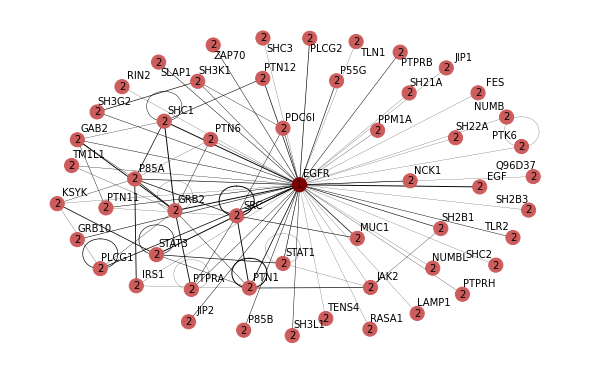

In [ ]:
#@title Output Graph

# This code is to format the input and build protein network graph
protein_input_cleaned = []
protein_input_list = protein_inputs.value.split("\n")
for p in protein_input_list:
    if any(p):
        protein_input_cleaned.append(p)
filter_template = {}
filter_template["species"] =  species_options.value
filter_template["minimum_interaction_score"] = float(minimum_score_slider.value)
if "All" not in detection_method_options.value:
    filter_template["detection_method"] = list(detection_method_options.value)
if "All" not in interaction_type_options.value:
    filter_template["interaction_type"] = list(interaction_type_options.value)

plt.figure(figsize = (8,5))
if not any(protein_input_cleaned):
  raise Exception("Missing protein inputs")

protein_list = format_protein_list(protein_input_cleaned,\
                                   species_uniprot_dict[species_options.value])
G = build_graph(protein_list,filter_template,breadth_input.value)
draw_graph(G)